##**libraries to be installed before going further**

In [ ]:
## for connecting the Gdrive with current notebook 

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as MSE
import math

In [ ]:
# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


#**Data loading from saved gdrive folders**



1.   click on folder icon on left side
2.   goto mydrive and go to your folder where data is saved
3. right click on that file and click on copy parth and paste like below      between the '  '.



In [ ]:
# input = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/HOR 78/1 input without noise.csv')
# output = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/HOR 78/1 output without noise.csv')
# disturbance = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/HOR 78/Random Disturbance.csv')
# only_input = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Only_manipulated_input.csv')
# #plant_measurement_T = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/test_P_measurement_0.25.csv')
# states_with_noise = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/HOR 78/True_states.csv')
# plant_measurement_T = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/HOR 78/Plant_Measurement.csv')

input = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/orignal/1 input without noise.csv')
output = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/orignal/1 output without noise.csv')
disturbance = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/orignal/Random Disturbance.csv')
only_input = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Only_manipulated_input.csv')
#plant_measurement_T = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/test_P_measurement_0.25.csv')
states_with_noise = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/orignal/True_states.csv')
plant_measurement_T = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/orignal/Plant_Measurement.csv')


# input = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/RK 60%/1 input without noise.csv')
# output = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/RK 60%/1 output without noise.csv')
# disturbance = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/RK 60%/Random Disturbance.csv')
# only_input = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Only_manipulated_input.csv')
# #plant_measurement_T = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/test_P_measurement_0.25.csv')
# states_with_noise = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/RK 60%/True_states.csv')
# plant_measurement_T = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/RK 60%/Plant_Measurement.csv')


# #######################################################
estimated_using_1stprinciple = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/CSTR+-+State+estimation+using+1st+principle.csv')

#######################################################


input = np.asarray(input)
output = np.asarray(output)
disturbance = np.array(disturbance)
only_input = np.array(only_input)
plant_measurement_T = np.array(plant_measurement_T)
states_with_noise = np.array(states_with_noise)
estimated_using_1stprinciple = np.array(estimated_using_1stprinciple)

print('Length of the total dataset:',len(input))

plant_measurement_T = plant_measurement_T[:,1].reshape(-1,1)

#######################################################
#output[:,0] = 100*output[:,0]
#print(output)

# mean = input.mean(axis=0)
# std = input.std(axis=0)

# input = (input-mean)/std
# output[:,0] = (output[:,0]-mean[-2:][1])/std[-2:][1]
# output[:,1] = (output[:,1]-mean[-2:][0])/std[-2:][0]
# plant_measurement_T [:,0] = (plant_measurement_T [:,0]-mean[-2:][1])/std[-2:][1]
# plant_measurement_T [:,1] = (plant_measurement_T [:,1]-mean[-2:][0])/std[-2:][0]
#######################################################

input_train = input[:15000]  
output_train = output[:15000]    
disturbance_train = disturbance[:15000]
onlyinput_train = only_input[:15000]
plantmeasurement_train = plant_measurement_T[:15000]
statewithnoise_train = states_with_noise[:15000]

input_test = input[15000:16666]
output_test = output[15000:16666]
disturbance_test = disturbance[15000:16666]
onlyinput_test = only_input[15000:16666]
plantmeasurement_test = plant_measurement_T[15000:16666]
statewithnoise_test = states_with_noise[15000:16666]

print('Length of the training set:',len(input_train),'\nLength of test set:',len(input_test))



Length of the total dataset: 19997
Length of the training set: 15000 
Length of test set: 1666


##**train dataset is divided into train and validation sets**

In [ ]:
x_train = torch.from_numpy(input_train[:13333].astype(np.float32))
y_train = torch.from_numpy(output_train[:13333].astype(np.float32))
x_test = torch.from_numpy(input_train[13333:].astype(np.float32))
y_test = torch.from_numpy(output_train[13333:].astype(np.float32))

print(f' Train input set: {type(x_train), x_train.shape}, Test input: {type(x_test), x_test.shape} ')
print(f' Train target set: {type(y_train), y_train.shape}, Test target: {type(y_test), y_test.shape} ')

 Train input set: (<class 'torch.Tensor'>, torch.Size([13333, 4])), Test input: (<class 'torch.Tensor'>, torch.Size([1667, 4])) 
 Train target set: (<class 'torch.Tensor'>, torch.Size([13333, 2])), Test target: (<class 'torch.Tensor'>, torch.Size([1667, 2])) 


#**Loading the weights which was trained using ANN inbuilt notebook**

###**partially trained weights for 40% reduced rate constant**

In [ ]:

# wi = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/digvijay weights/ANN unnorm weights/optimized weights RK/w_in_h1.pt',map_location=torch.device('cpu'),).detach().numpy()
# bi = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/digvijay weights/ANN unnorm weights/optimized weights RK/b_in_h1.pt',map_location=torch.device('cpu')).detach().numpy()
# wh1 = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/digvijay weights/ANN unnorm weights/optimized weights RK/w_h1_h2.pt',map_location=torch.device('cpu')).detach().numpy()
# bh1 = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/digvijay weights/ANN unnorm weights/optimized weights RK/b_h1_h2.pt',map_location=torch.device('cpu')).detach().numpy()
# wh2 = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/digvijay weights/ANN unnorm weights/optimized weights RK/w_h2_out.pt',map_location=torch.device('cpu')).detach().numpy()
# bh2 = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/digvijay weights/ANN unnorm weights/optimized weights RK/b_h2_out.pt',map_location=torch.device('cpu')).detach().numpy()


###**partially trained weights for 40% reduced heat of reaction**

In [ ]:
# wi = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/digvijay weights/ANN unnorm weights/optimized weights HOR/w_in_h1.pt',map_location=torch.device('cpu'),).detach().numpy()
# bi = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/digvijay weights/ANN unnorm weights/optimized weights HOR/b_in_h1.pt',map_location=torch.device('cpu')).detach().numpy()
# wh1 = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/digvijay weights/ANN unnorm weights/optimized weights HOR/w_h1_h2.pt',map_location=torch.device('cpu')).detach().numpy()
# bh1 = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/digvijay weights/ANN unnorm weights/optimized weights HOR/b_h1_h2.pt',map_location=torch.device('cpu')).detach().numpy()
# wh2 = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/digvijay weights/ANN unnorm weights/optimized weights HOR/w_h2_out.pt',map_location=torch.device('cpu')).detach().numpy()
# bh2 = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/digvijay weights/ANN unnorm weights/optimized weights HOR/b_h2_out.pt',map_location=torch.device('cpu')).detach().numpy()

###**weights for data withought any faults**

In [ ]:

wi = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/digvijay weights/ANN unnorm weights/w_in_h1.pt',map_location=torch.device('cpu'),).detach().numpy()
bi = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/digvijay weights/ANN unnorm weights/b_in_h1.pt',map_location=torch.device('cpu')).detach().numpy()
wh1 = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/digvijay weights/ANN unnorm weights/w_h1_h2.pt',map_location=torch.device('cpu')).detach().numpy()
bh1 = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/digvijay weights/ANN unnorm weights/b_h1_h2.pt',map_location=torch.device('cpu')).detach().numpy()
wh2 = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/digvijay weights/ANN unnorm weights/w_h2_out.pt',map_location=torch.device('cpu')).detach().numpy()
bh2 = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/digvijay weights/ANN unnorm weights/b_h2_out.pt',map_location=torch.device('cpu')).detach().numpy()


In [ ]:
print('w_in_h1 (input-1st hidden layer weights) :',wi)
print('b_in_h1 (input-1st hidden layer biases):',bi)
print('w_h1_h2 (1st hidden layer-2nd hidden layer weights):',wh1)
print('b_h1_h2 (1st hidden layer-2nd hidden layer biases):',bh1)
print('w_h2_out (2nd hidden layer - output layer weights):',wh2)
print('b_h2_out (2nd hidden layer - output layer biases):',bh2)

w_in_h1 : [[ 0.2576316  -0.22068912 -0.09693074  0.23468447]
 [-0.47071844  0.29985863 -0.10286266  0.25437194]
 [-0.12257759 -0.25330767  0.23216504 13.859017  ]
 [ 0.18261409 -0.1948505  -0.03645438 -0.04501367]
 [-0.34356713 -0.41803235  0.4146724  14.838348  ]
 [-0.18620312 -0.30198067 -0.08380783 -0.21567035]
 [-0.39083433 -0.2066672   0.38911113 15.388969  ]
 [-0.6550348   0.14370055  0.23604196 14.797488  ]]
b_in_h1 : [ 0.3300299  -0.45556885 -1.6765939  -0.24116606 -0.9694477  -0.0832845
 -1.1548691  -1.4956264 ]
w_h1_h2 : [[ 0.34691295 -0.14958788  0.26513845  0.00418666 -0.18625809  0.18173169
  -0.18767326  0.10398171]
 [-0.10209109 -0.03876161  0.16514288 -0.16856779  0.52062494 -0.08594079
   0.70466596  0.7689817 ]
 [-0.01655465 -0.23599091  0.6235591   0.1097278   0.02415211  0.2296487
   0.49504286  0.70688474]
 [-0.19818775 -0.058197   -0.00684899  0.05163912 -0.26831812 -0.2508894
   0.19233465 -0.08290542]
 [ 0.17270143  0.02015606  0.5227286   0.07774239  0.39764953

#**Manually coded ANN model approach 1**

In [ ]:
# u1 = x_train[:,0]
# u2 = x_train[:,1]
# u3 = x_train[:,2]
# u4 = x_train[:,3]

In [ ]:

# def model_ANN(x_train):
#   out1 = []
#   out2 = []

#   for k in range(len(x_train)):

#     hh = []
#     for j in range(8):
      
#       a = bi[j] + (wi[j][0]*u1[k]) + (wi[j][1]*u2[k]) + (wi[j][2]*u3[k]) + (wi[j][3]*u4[k])
#       b = max(0,a)
#       hh.append(b)
    
#     h = hh

#     HH= []
#     for i in range(8):

#       c = bh1[i] + (wh1[i][0]*h[0])+ (wh1[i][1]*h[1]) + (wh1[i][2]*h[2]) + (wh1[i][3]*h[3]) + (wh1[i][4]*h[4]) + (wh1[i][5]*h[5]) + (wh1[i][6]*h[6]) + (wh1[i][7]*h[7]) 
          
#       d = max(0,c)
#       HH.append(d)
    
#     H = HH
    
#     o1 = bh2[0] + (wh2[0][0]*H[0])+ (wh2[0][1]*H[1]) + (wh2[0][2]*H[2]) + (wh2[0][3]*H[3]) + (wh2[0][4]*H[4]) + (wh2[0][5]*H[5]) + (wh2[0][6]*H[6]) + (wh2[0][7]*H[7])
#     o2 = bh2[1] + (wh2[1][0]*H[0])+ (wh2[1][1]*H[1]) + (wh2[1][2]*H[2]) + (wh2[1][3]*H[3]) + (wh2[1][4]*H[4]) + (wh2[1][5]*H[5]) + (wh2[1][6]*H[6]) + (wh2[1][7]*H[7])

#     out1.append(o1)
#     out2.append(o2)
#   #out1 = out1.detach().numpy()
#   #out2 = out2.detach().numpy()

#   out2 = np.array(out2)
#   out1 = np.array(out1)

#   out1 = out1.reshape(-1,1)
#   out2 = out2.reshape(-1,1)

#   return np.concatenate((out1,out2),axis=1)



In [ ]:
# output = model_ANN(x_train)

#**Manually coded ANN model for partial weight training**
use only this model for partial weight training, approach 1 model will not work while backpropagation

###**Allowing the backpropagation for tarined weight**

In [ ]:
wi = torch.tensor(wi,requires_grad=True)
bi = torch.tensor(bi,requires_grad=True)
wh1 = torch.tensor(wh1,requires_grad=True)
bh1 = torch.tensor(bh1,requires_grad=True)
wh2 = torch.tensor(wh2,requires_grad=True)
bh2 = torch.tensor(bh2,requires_grad=True)

**creating dummy weights so that we can keep some of the weights constant**

In [ ]:
wi_copy = wi
bi_copy = bi
wh1_copy = wh1
wh2_copy = wh2
bh1_copy = bh1
bh2_copy = bh2

##**manual ANN model approach 2**

In [ ]:
zero = torch.tensor([0]).to(device)
def model(x):
  a = (torch.max(zero,x @ wi.T + bi))
  b = (torch.max(zero,a @ wh1.T + bh1))
  c = (b @ wh2.T + bh2)
  return c

In [ ]:
prediction = model(x_train.float())
prediction[:10]

tensor([[2.4469e-01, 3.9520e+02],
        [2.2764e-01, 3.9497e+02],
        [2.2138e-01, 3.9424e+02],
        [2.2526e-01, 3.9337e+02],
        [2.3548e-01, 3.9265e+02],
        [2.4762e-01, 3.9228e+02],
        [2.5813e-01, 3.9225e+02],
        [2.6464e-01, 3.9250e+02],
        [2.6608e-01, 3.9291e+02],
        [2.6289e-01, 3.9334e+02]], grad_fn=<SliceBackward0>)

In [ ]:
true = y_train
true[:10]

tensor([[2.3385e-01, 3.9571e+02],
        [2.2842e-01, 3.9526e+02],
        [2.3064e-01, 3.9428e+02],
        [2.3786e-01, 3.9321e+02],
        [2.4685e-01, 3.9239e+02],
        [2.5488e-01, 3.9196e+02],
        [2.6008e-01, 3.9195e+02],
        [2.6155e-01, 3.9229e+02],
        [2.5947e-01, 3.9282e+02],
        [2.5497e-01, 3.9338e+02]])

###**LOSS function**

In [ ]:
def MSE2(y_pred, y_true):

  return torch.sum((y_pred-y_true)**2)/(y_true-y_pred).numel()

**calculating initial loss**

In [ ]:
error = MSE2(prediction,true)
error

tensor(0.0711, grad_fn=<DivBackward0>)

##**Partial weight training of ANN**

please refer to the thesis(digvijay) for understanding the ADAM optimizer

In [ ]:
'''
following are the hyperparameters and you have to do trial and error method for better results
'''
epochs = 150000
Vwi = 0;Vbi=0;Vwh1 = 0;Vbh1=0;Vwh2=0;Vbh2=0
bita1 = 0.9
bita2 = 0.9
ita = 0.1
delta = 0.00015 # learning rate
gamawi = 0;gamabi=0;gamawh1=0;gamabh1=0;gamawh2=0;gamabh2=0

####################################################################################

for epoch in range(epochs):
  
  prediction = model(x_train.float())
  error = MSE2(prediction,true)
  if epoch % 500==0:
    print('Iteration :',epoch,' Train Error :',error)
  error.backward()

  with torch.no_grad():

    #weights between input and 1st hidden layer

    Vwi = bita1*Vwi + (1-bita1)* wi.grad
    gamawi = (bita2 * gamawi) + (1-bita2)*((wi.grad)**2)
    wi -= (delta/((gamawi)**0.5 + ita))*Vwi

   
    #now i will make some of the weights constant for the input and 1st hidden layer (category 1)
 
    wi.T[0,1] = wi_copy.T[0,1]
    wi.T[0,2] = wi_copy.T[0,2];wi.T[0,3] = wi_copy.T[0,3];wi.T[1,1] = wi_copy.T[1,1];wi.T[1,2] = wi_copy.T[1,2]
    wi.T[1,3] = wi_copy.T[1,3];wi.T[2,2] = wi_copy.T[2,2];wi.T[2,3] = wi_copy.T[2,3];wi.T[3,1] = wi_copy.T[3,1];wi.T[3,2] = wi_copy.T[3,2]
    wi.T[3,3] = wi_copy.T[3,3]
  #################################################################################

    # input - 1st hidden layer biases

    Vbi = bita1*Vbi + (1-bita1)* bi.grad
    gamabi = (bita2 * gamabi) + (1-bita2)*((bi.grad)**2)
    bi -= (delta/((gamabi)**0.5 + ita))*Vbi
    
    # now i will make some of the biases constant (category 1)
  
    bi[1] = bi_copy[1];bi[2] = bi_copy[2];bi[3] = bi_copy[3]

   ##################################################################################

    # 1st hidden layer - 2nd hidden layer weights

    Vwh1 = bita1*Vwh1 + (1-bita1)* wh1.grad
    gamawh1 = (bita2 * gamawh1) + (1-bita2)*((wh1.grad)**2)
    wh1 -= (delta/((gamawh1)**0.5 + ita))*Vwh1
  
    # now i will make some of the weights constant for the 1st hidden layer - 2nd hidden layer weights (category 1)
    
    wh1.T[1,0] = wh1_copy.T[1,0];wh1.T[1,2] = wh1_copy.T[1,2];wh1.T[1,3] = wh1_copy.T[1,3];wh1.T[1,4] = wh1_copy.T[1,4];wh1.T[1,5] = wh1_copy.T[1,5]
    wh1.T[1,6] = wh1_copy.T[1,6];wh1.T[2,0] = wh1_copy.T[2,0];wh1.T[2,1] = wh1_copy.T[2,1];wh1.T[2,2] = wh1_copy.T[2,2];wh1.T[2,3] = wh1_copy.T[2,3]
    wh1.T[2,4] = wh1_copy.T[2,4];wh1.T[2,5] = wh1_copy.T[2,5];wh1.T[2,6] = wh1_copy.T[2,6];wh1.T[2,7] = wh1_copy.T[2,7];wh1.T[3,0] = wh1_copy.T[3,0]
    wh1.T[3,1] = wh1_copy.T[3,1];wh1.T[3,2] = wh1_copy.T[3,2];wh1.T[3,3] = wh1_copy.T[3,3];wh1.T[3,4] = wh1_copy.T[3,4];wh1.T[3,5] = wh1_copy.T[3,5]
    wh1.T[3,6] = wh1_copy.T[3,6];wh1.T[3,7] = wh1_copy.T[3,7]

   ###########################################################################################

    # 1st hidden layer - 2nd hidden layer biases

    Vbh1 = bita1*Vbh1 + (1-bita1)* bh1.grad
    gamabh1 = (bita2 * gamabh1) + (1-bita2)*((bh1.grad)**2)
    bh1 -= (delta/((gamabh1)**0.5 + ita))*Vbh1

    ########################################################################### 

    # 2nd hidden layer - output layer weights

    Vwh2 = bita1*Vwh2 + (1-bita1)* wh2.grad
    gamawh2 = (bita2 * gamawh2) + (1-bita2)*((wh2.grad)**2)
    wh2 -= (delta/((gamawh2)**0.5 + ita))*Vwh2
   #######################################################################################

    # 2nd hidden layer - output layer biases

    Vbh2 = bita1*Vbh2 + (1-bita1)* bh2.grad
    gamabh2 = (bita2 * gamabh2) + (1-bita2)*((bh2.grad)**2)
    bh2 -= (delta/((gamabh2)**0.5 + ita))*Vbh2
  
    #######################################################################################
    # setting gradients to zero for next iteration

    wi.grad.zero_()
    bi.grad.zero_()
    wh1.grad.zero_()
    bh1.grad.zero_()
    wh2.grad.zero_()
    bh2.grad.zero_()



**Error calculation after partial training**

In [ ]:
prediction = model(x_train.float())
loss = MSE2(prediction,true)
loss

tensor(75.0990, grad_fn=<DivBackward0>)

**saving the partially trained weights**

In [ ]:

# torch.save(wi,'w_in_h1.pt')
# torch.save(bi,'b_in_h1.pt')
# torch.save(wh1,'w_h1_h2.pt')
# torch.save(bh1,'b_h1_h2.pt')
# torch.save(wh2,'w_h2_out.pt')
# torch.save(bh2,'b_h2_out.pt')

**Uploading the weight in Gdrive for using them again**

In [ ]:

# #!pip install --upgrade gupload

# from pydrive.auth import GoogleAuth
# from google.colab import auth

# # Authenticate and create the PyDrive client.
# auth.authenticate_user()

# !gupload --to '1hYx2GT8XhNW4Jxx_QvXgmu6HTVDJ8FDD' *.pt


In [ ]:
prediction = model(x_train.float())
a = prediction.detach().numpy()

###**Training dataset predictions**

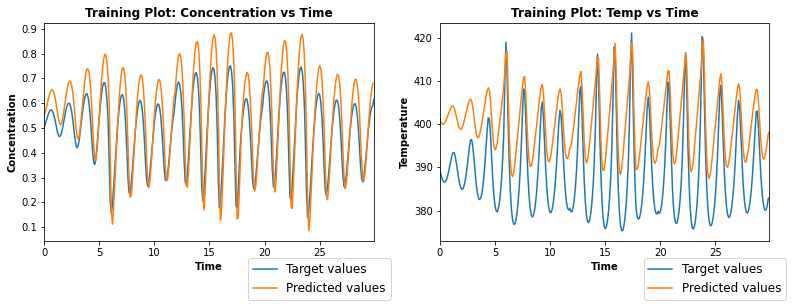

In [ ]:

true = y_train.detach().numpy()

checktrain = x_train.detach().numpy()

###########################

x = 0.1*np.arange(0,len(checktrain[200:500,0]))
plt.figure(1,figsize=(13,4))

plt.subplot(1,2,1)
plt.plot(x,true[200:500,0], label='Target values',)
plt.plot(x, a[200:500,0], label='Predicted values')
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Concentration',fontweight='bold')
#plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Training Plot: Concentration vs Time',fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(0.6, -0.3), loc='lower left',fontsize = 12) #
plt.autoscale(enable=True, axis='x', tight=True)
#plt.savefig('conc opti_60% RK data.png',dpi=250,bbox_extra_artists=(lgd,), bbox_inches='tight')

#plt.figure(2)
plt.subplot(1,2,2)
plt.plot(x,true[200:500,1], label='Target values')
plt.plot(x, a[200:500,1], label='Predicted values')
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Temperature',fontweight='bold')
#plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Training Plot: Temp vs Time',fontweight='bold')
lgd = plt.legend( bbox_to_anchor=(0.6, -0.3),loc='lower left',fontsize = 12) #bbox_to_anchor=(1.02, 1)
plt.autoscale(enable=True, axis='x', tight=True)
#plt.savefig(' train prediction_60% HOR data.png',dpi=250,bbox_extra_artists=(lgd,), bbox_inches='tight')

###**Test dataset predictions**

In [ ]:
zero = torch.tensor([0])
def model(x):
  a = torch.max(zero,x @ wi.T + bi)
  b = torch.max(zero,a @ wh1.T + bh1)
  c = b @ wh2.T + bh2
  return c

In [ ]:
prediction = model(x_test.float())
#prediction2 = (prediction * std2) + mean2
a = prediction.detach().numpy()

In [ ]:
error = MSE2(prediction,y_test)
error

tensor(76.4788, grad_fn=<DivBackward0>)

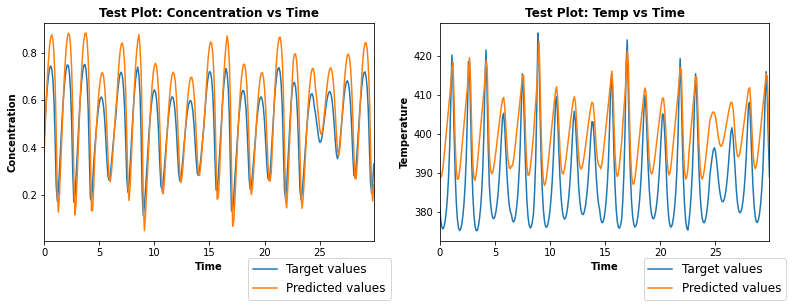

In [ ]:
#true = target[200:450]
true = y_test.detach().numpy()
#true = ((true*std2)+mean2).detach().numpy()

checktrain = x_test.detach().numpy()

###########################

x = 0.1*np.arange(0,len(checktrain[200:500,0]))
plt.figure(1,figsize=(13,4))
plt.subplot(1,2,1)
plt.plot(x,true[200:500,0], label='Target values')
plt.plot(x, a[200:500,0], label='Predicted values')
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Concentration',fontweight='bold')
#plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Test Plot: Concentration vs Time',fontweight='bold')
lgd = plt.legend( bbox_to_anchor=(0.6, -0.3),loc='lower left',fontsize = 12)
plt.autoscale(enable=True, axis='x', tight=True)
#plt.savefig('conc opti_60% RK data test set.png',dpi=250,bbox_extra_artists=(lgd,), bbox_inches='tight')

#plt.figure(2)
plt.subplot(1,2,2)
plt.plot(x,true[200:500,1], label='Target values')
plt.plot(x, a[200:500,1], label='Predicted values')
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Temperature',fontweight='bold')
#plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Test Plot: Temp vs Time',fontweight='bold')
lgd = plt.legend( bbox_to_anchor=(0.6, -0.3),loc='lower left',fontsize = 12)
plt.autoscale(enable=True, axis='x', tight=True)
#plt.savefig('test predictions_60% HOR data.png',dpi=250,bbox_extra_artists=(lgd,), bbox_inches='tight')

##**ANN EKF for approach 1 manually coded ANN**

In [ ]:
'''
wi = wi.detach().numpy()
bi = bi.detach().numpy()
wh1 = wh1.detach().numpy()
wh2 = wh2.detach().numpy()
bh1 = bh1.detach().numpy()
bh2 = bh2.detach().numpy()

x_train = x_train.detach().numpy()
x_test = x_test.detach().numpy()
y_train = y_train.detach().numpy()
y_test = y_test.detach().numpy()

'''

'\nwi = wi.detach().numpy()\nbi = bi.detach().numpy()\nwh1 = wh1.detach().numpy()\nwh2 = wh2.detach().numpy()\nbh1 = bh1.detach().numpy()\nbh2 = bh2.detach().numpy()\n\nx_train = x_train.detach().numpy()\nx_test = x_test.detach().numpy()\ny_train = y_train.detach().numpy()\ny_test = y_test.detach().numpy()\n\n'

In [ ]:
'''
def model_EKF_ANN(x_train):
    
  u1 = x_train[0];u2 = x_train[1];u3 =x_train[2];u4 = x_train[3]
  hh = []
  for j in range(8):
          
    a = np.array(bi[j] + (wi[j][0]*u1) + (wi[j][1]*u2) + (wi[j][2]*u3) + (wi[j][3]*u4))

    b = max(0,a)
    hh.append(b)
  
  h = hh
  HH= []
  for i in range(8):

    c = np.array(bh1[i] + (wh1[i][0]*h[0])+ (wh1[i][1]*h[1]) + (wh1[i][2]*h[2]) + (wh1[i][3]*h[3]) + 
          (wh1[i][4]*h[4]) + (wh1[i][5]*h[5]) + (wh1[i][6]*h[6]) + (wh1[i][7]*h[7]))
          
    d = max(0,c)
    HH.append(d)

  H = HH

  out1 = bh2[0] + (wh2[0][0]*H[0])+ (wh2[0][1]*H[1]) + (wh2[0][2]*H[2]) + (wh2[0][3]*H[3]) + (wh2[0][4]*H[4]) + (wh2[0][5]*H[5]) + (wh2[0][6]*H[6]) + (wh2[0][7]*H[7])
  out2 = bh2[1] + (wh2[1][0]*H[0])+ (wh2[1][1]*H[1]) + (wh2[1][2]*H[2]) + (wh2[1][3]*H[3]) + (wh2[1][4]*H[4]) + (wh2[1][5]*H[5]) + (wh2[1][6]*H[6]) + (wh2[1][7]*H[7])


  return out1,out2,h,H

'''

'\ndef model_EKF_ANN(x_train):\n    \n  u1 = x_train[0];u2 = x_train[1];u3 =x_train[2];u4 = x_train[3]\n  hh = []\n  for j in range(8):\n          \n    a = np.array(bi[j] + (wi[j][0]*u1) + (wi[j][1]*u2) + (wi[j][2]*u3) + (wi[j][3]*u4))\n\n    b = max(0,a)\n    hh.append(b)\n  \n  h = hh\n  HH= []\n  for i in range(8):\n\n    c = np.array(bh1[i] + (wh1[i][0]*h[0])+ (wh1[i][1]*h[1]) + (wh1[i][2]*h[2]) + (wh1[i][3]*h[3]) + \n          (wh1[i][4]*h[4]) + (wh1[i][5]*h[5]) + (wh1[i][6]*h[6]) + (wh1[i][7]*h[7]))\n          \n    d = max(0,c)\n    HH.append(d)\n\n  H = HH\n\n  out1 = bh2[0] + (wh2[0][0]*H[0])+ (wh2[0][1]*H[1]) + (wh2[0][2]*H[2]) + (wh2[0][3]*H[3]) + (wh2[0][4]*H[4]) + (wh2[0][5]*H[5]) + (wh2[0][6]*H[6]) + (wh2[0][7]*H[7])\n  out2 = bh2[1] + (wh2[1][0]*H[0])+ (wh2[1][1]*H[1]) + (wh2[1][2]*H[2]) + (wh2[1][3]*H[3]) + (wh2[1][4]*H[4]) + (wh2[1][5]*H[5]) + (wh2[1][6]*H[6]) + (wh2[1][7]*H[7])\n\n\n  return out1,out2,h,H\n\n'

###**manaul ANN MODEL approach 2 for EKF use**

In [ ]:
zero = torch.tensor([0])
def model_EKF_ANN(x):
  a = torch.max(zero,x @ wi.T + bi)
  b = torch.max(zero,a @ wh1.T + bh1)
  c = b @ wh2.T + bh2
  return c,a,b

In [ ]:
def EKF(x_pred, cov_est, u, yk, d,hidden1,hidden2) :

    n_st =2
    n_op = 1
    n_ip=2

    bb = W_states_input.copy()
    aa = w_h1_h2.copy()
    cc = w_h2_out.copy()
    # aa is 8*8 matrix
    # bb is 8*2 matrix
    # cc is 2*8 matrix

    Q = np.diagflat([0.012**2,0.012**2])

    R = 0.15**2    
    #R = np.diag([0.01**2 ,0.15**2])

    C = [0,1]
    # C= np.zeros((2,2))
    # C[0][0]=1
    # C[1][1]=1                                                                                                                           

    C = np.array(C)
    C = np.mat(C) 

    x_pred = x_pred.reshape(n_st,1)

    #yk = yk.reshape(2,1)
    yk = yk.reshape(1,1)

    u = u.reshape(n_ip,1)
    d= d.reshape(1,1)


###############################  FOR CHECKING IF HIDDEN VALUE 0 THEN MAKE CHANGES IN PHI ################
########################################### PHi from RNN ################################

  
    for i in range(len(hidden1)):

        if hidden1[i]==0:
          for j in range(2):
              bb[i][j]=0

    for i in range(len(hidden2)):

      if hidden2[i]==0:
          for j in range(8):
              aa[i][j]=0

    a = np.dot(aa,bb)
    phi_EKF = np.dot(cc,a)

######################################################################################

    # one line calc gammad

    C_lin = C
    
    cov_pred = np.dot(phi_EKF,np.dot(cov_est,phi_EKF.T))

    #cov_pred = np.dot(phi_EKF,np.dot(cov_est,phi_EKF.T)) + gamma_bd*Q*gamma_bd.T

    kgain = np.dot(C_lin,np.dot(cov_pred,C_lin.T)) + R

    inv_kgain = kgain.I  
    
    K_gain = np.dot(cov_pred,np.dot(C_lin.T,inv_kgain))

    y_pred = np.dot(C_lin,x_pred)
    #y_pred = y_pred.reshape(2,1)
    y_pred = y_pred.reshape(1,1)

    x_est = x_pred + np.dot(K_gain,(yk - y_pred))
    cov_est = cov_pred - np.dot(K_gain, np.dot(C_lin,cov_pred))
              
    return x_est, cov_est

##**Data Preparation**

In [ ]:
T=1
def Dataloader(seriesss,target,disturbance1,mani_input,plant,mech_EKF,T):
     
     data4 = []
     output = []
     d = []
     minput = []
     pmeasurement = []
     result_1stEKF = []

     for i in range(len(seriesss)-T):
         x = seriesss[i:i+T]
         data4.append(x)

         y = target[i+T-1]
         output.append(y)

         z = disturbance1[i+T-1]
         d.append(z)

         w = mani_input[i+T-1]
         minput.append(w)

         v = plant[i+T-1]
         pmeasurement.append(v)

         f = mech_EKF[i+T-1]
         result_1stEKF.append(f)


     #data4 = np.array(seriesss[1:,:])
     data4 = np.array(data4)
     output = np.asarray(output)
     d = np.asarray(d)
     minput = np.asarray(minput)
     pmeasurement = np.asarray(pmeasurement)
     result_1stEKF = np.asarray(result_1stEKF)


     data4 = data4.reshape(-1,4)
     output = output.reshape(-1,2)# change when output length changes
     d = d.reshape(-1,1)
     minput = minput.reshape(-1,2)
     pmeasurement = pmeasurement.reshape(-1,1)
     #pmeasurement = pmeasurement.reshape(-1,2)
     result_1stEKF = result_1stEKF.reshape(-1,2)

     return data4,output,d,minput,pmeasurement,result_1stEKF

In [ ]:
inputnew, true_states, disturbancenew, minputnew, measured_states, mech_EKF_result = Dataloader(input_test, statewithnoise_test, disturbance_test, onlyinput_test,plantmeasurement_test,estimated_using_1stprinciple,T)

print('Disturbance shape:',disturbancenew.shape, type(disturbancenew))
print('Manipulated input shape:',minputnew.shape, type(minputnew))
print('Input shape:', inputnew.shape, type(inputnew))
print('Output shape:', true_states.shape, type(true_states))
print('plant measurement shape:', measured_states.shape, type(measured_states))
print('1st principle estimation shape:', mech_EKF_result.shape, type(measured_states))
print('\n')

print(inputnew.shape,true_states.shape)
print('\nType of input data:',type(inputnew))

inputnew = torch.from_numpy(inputnew.astype(np.float32))
print('\nType of input data:',type(inputnew))
print('\nType of output data:',type(true_states))

inputnew = inputnew.to(device)


Disturbance shape: (1665, 1) <class 'numpy.ndarray'>
Manipulated input shape: (1665, 2) <class 'numpy.ndarray'>
Input shape: (1665, 4) <class 'numpy.ndarray'>
Output shape: (1665, 2) <class 'numpy.ndarray'>
plant measurement shape: (1665, 1) <class 'numpy.ndarray'>
1st principle estimation shape: (1665, 2) <class 'numpy.ndarray'>


(1665, 4) (1665, 2)

Type of input data: <class 'numpy.ndarray'>

Type of input data: <class 'torch.Tensor'>

Type of output data: <class 'numpy.ndarray'>


In [ ]:

w_in_h1 = wi.detach().numpy()
w_h1_h2 = wh1.detach().numpy()
w_h2_out = wh2.detach().numpy()

W_states_input =w_in_h1[:,2:]

W_hidden2_xy = np.dot(w_h1_h2,W_states_input)

w_final_xy = np.dot(w_h2_out,W_hidden2_xy)

##**EKF Implementation**

In [ ]:
model_predictions = []
updated_predictions = []

x_est = [0.257,391.57]

x_est = np.array(x_est)

cov_est = np.diagflat([0.0001,0.0001])

last_x = inputnew[0]


###################################################

phi_test = w_final_xy.copy()

######################################################
i=0

while len(model_predictions)<(len(true_states)-1):
    u = minputnew[i]
    d = disturbancenew[i]
    d = np.array(d)
    yk = measured_states[i]

    i = i+1
    input_ = torch.tensor(last_x.reshape(1,4))    # done as input needs 3 dimension (needs 1 as batch dimension too !!)

    p,hidden1,hidden2 = model_EKF_ANN(input_.float())
    p = p[0].detach().numpy()

    hidden1 = hidden1[0].detach().numpy()
    hidden2 = hidden2[0].detach().numpy()
    
##################################

    test2=[]

    test2.append(p[0])
    test2.append(p[1])
    
    x_pred= np.array(test2)

    x_est, cov_est  = EKF(x_pred,cov_est,u,yk,d,hidden1,hidden2)
 
    x_est = np.array(x_est)

    updated_predictions.append(x_est.reshape(-1,2))

    cov_est = np.array(cov_est)

    dummy = torch.from_numpy(x_est.T.astype(np.float32))

    model_predictions.append(x_pred)


    last_x[0] = inputnew[i,0]
    last_x[1] = inputnew[i,1]

    last_x[2] = dummy[0,1]  
    last_x[3] = dummy[0,0] 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
updated_predictions2 = np.array(updated_predictions)
model_predictions2 = np.array(model_predictions)
print('Shape of EKF prediction:',updated_predictions2.shape)
print('Shape of model prediction:',model_predictions2.shape)

updated_predictions2 = updated_predictions2.reshape(-1,2)
model_predictions2 = model_predictions2.reshape(-1,2)
print('Shape of EKF prediction reshape:',updated_predictions2.shape)
print('Shape of model prediction reshape:',model_predictions2.shape)

Shape of EKF prediction: (1664, 1, 2)
Shape of model prediction: (1664, 2)
Shape of EKF prediction reshape: (1664, 2)
Shape of model prediction reshape: (1664, 2)


In [ ]:
print('concentration: ',updated_predictions2[100:120,0],'Temperature: ',updated_predictions2[100:120,1],sep = '\n')

concentration: 
[0.23215234 0.30923717 0.33294575 0.33035952 0.30289537 0.27669474
 0.25180075 0.22820995 0.28050863 0.25573226 0.30667883 0.28062108
 0.280552   0.33029194 0.27805694 0.27795557 0.27797456 0.27797965
 0.30284116 0.31914528]
Temperature: 
[391.0008383  391.99865236 393.99979247 396.00027048 397.00062165
 397.00047454 396.00034979 394.00024844 393.99897869 393.00041732
 393.99912718 394.00054145 394.00002291 395.99922683 396.00101715
 395.99997727 395.99997483 395.99997521 396.99957806 399.99989053]


In [ ]:
time = np.arange(0,len(updated_predictions2[610:625,0]))

error_conc_EKF = MSE(true_states[:1665-T,0],updated_predictions2[:1665-T,0])
error_conc_Model = MSE(true_states[:1665-T,0],model_predictions2[:,0])

error_temp_EKF = MSE(true_states[:1665-T,1],updated_predictions2[:1665-T,1])
error_temp_Model = MSE(true_states[:1665-T,1],model_predictions2[:,1])
error_temp_Measurement = MSE(true_states[:1665-T,1],measured_states[:1665-T,0])

error_conc_EKF_graph = true_states[:1665-T,0]-updated_predictions2[:1665-T,0]
error_conc_Model_graph = true_states[:1665-T,0]-model_predictions2[:,0]
error_temp_EKF_graph = true_states[:1665-T,1]-updated_predictions2[:1665-T,1]
error_temp_Model_graph = true_states[:1665-T,1]-model_predictions2[:,1]
error_temp_Measurement_graph = true_states[:1665-T,1]-measured_states[:1665-T,0]


error_conc_PhyEKF = MSE(true_states[:1665-T,0],mech_EKF_result[:1665-T,0])
error_temp_PhyEKF = MSE(true_states[:1665-T,1],mech_EKF_result[:1665-T,1])

RMSE_phyEKF_conc = np.sqrt(error_conc_PhyEKF)
RMSE_phyEKF_temp = np.sqrt(error_temp_PhyEKF)

RMSE_EKF_conc = np.sqrt(error_conc_EKF)
RMSE_EKF_temp = np.sqrt(error_temp_EKF)

print('error_conc_EKF',np.sqrt(error_conc_EKF))
print('error_conc_Model',np.sqrt(error_conc_Model))
print('error_temp_EKF',np.sqrt(error_temp_EKF))
print('error_temp_Model',np.sqrt(error_temp_Model))
print('error_temp_Measurement',np.sqrt(error_temp_Measurement))

print('\n')
print(RMSE_phyEKF_conc)
print(RMSE_phyEKF_temp)

error_conc_EKF 0.04453441780588572
error_conc_Model 0.06790228204620376
error_temp_EKF 0.33877073106350636
error_temp_Model 1.880255936686954
error_temp_Measurement 0.3387973639893821


0.02917786122863367
2.9253173418418683


###**True states VS Filtered states plots**

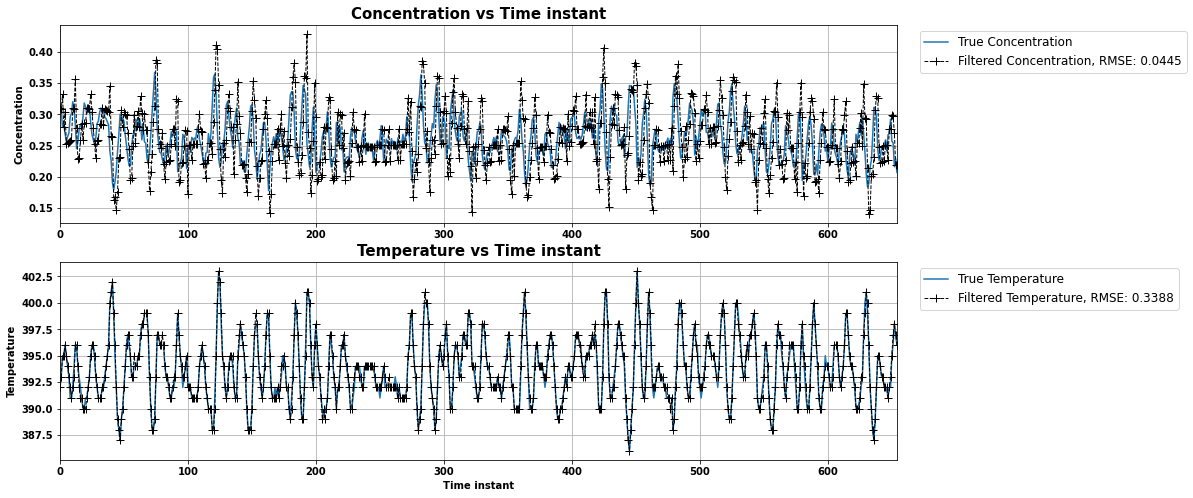

In [ ]:
time = np.arange(0,len(updated_predictions2[1000:1655,0]))

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.plot(time,true_states[1000:1655,0],label='True Concentration')
#plt.plot(time,measured_states[:1655,0]*100,label='Plant_Height1')
#plt.plot(time,mech_EKF_result[1000:1655,0],label='Phy_EKF_Conc, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_phyEKF_conc),color='forestgreen')
plt.plot(time,updated_predictions2[1000:1655,0],'k+--',label='Filtered Concentration, RMSE: {0:.4f}'.format(RMSE_EKF_conc),linewidth=1,markersize=7.5)
#plt.plot([],[],label='RMSE Height1_EKF vs True_height1 = {0:.4f}'.format(RMSE_height1))
#plt.plot([],[],label='RMSE Height1_model vs True_height1 = {0:.4f}'.format(RMSE_height1_model))
#plt.legend(bbox_to_anchor=(1.55, 0.78),loc='lower right',fontsize=17)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.grid()
#plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Concentration',fontsize=10, fontweight='bold')
plt.title('Concentration vs Time instant',fontsize=15, fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x', tight=True)
#plt.savefig('EKF opti conc_60% RK.png',dpi=250,bbox_extra_artists=(lgd,), bbox_inches='tight')

#plt.figure(figsize=(17,8))
plt.subplot(2,1,2)
plt.plot(time,true_states[1000:1655,1],label='True Temperature')
#plt.plot(time,measured_states[:1655,0],label='Plant_Temp',linewidth=2)
#plt.plot(time,mech_EKF_result[1000:1655,1],label='Phy_EKF_Temp, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_phyEKF_temp),color='forestgreen')
plt.plot(time,updated_predictions2[1000:1655,1],'k+--',label='Filtered Temperature, RMSE: {0:.4f}'.format(RMSE_EKF_temp),linewidth=1,markersize=7.5)
#plt.legend(bbox_to_anchor=(1.55, 0.727),loc='lower right',fontsize=17)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.grid()
plt.xlabel('Time instant',fontsize=10, fontweight='bold')
plt.ylabel('Temperature',fontsize=10, fontweight='bold')
plt.title('Temperature vs Time instant',fontsize=15, fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x', tight=True)
#plt.savefig('EKF _60% HOR.png',dpi=250,bbox_extra_artists=(lgd,), bbox_inches='tight')

###**Innovation plots**

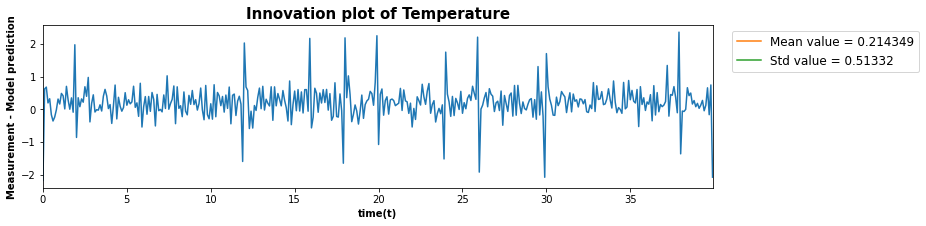

In [ ]:
t = 0.1*np.arange(len(model_predictions2[:400]))

plt.figure(1,figsize = (12,4))
plt.subplot(211)
#plt.plot(t,measured_states[:-1,0]-model_predictions2[:,0])
plt.plot(t,measured_states[:400,0]-model_predictions2[:400,0])
plt.plot([],[],label = "Mean value = %2.6f" % (np.mean(measured_states[:-1,0]-model_predictions2[:,0])))
plt.plot([],[],label = "Std value = %2.5f" % (np.std(measured_states[:-1,0]-model_predictions2[:,0])))
#plt.xlabel('time(t)',fontsize=12, fontweight='bold')
plt.ylabel('Measurement - Model prediction',fontsize=10, fontweight='bold')
plt.title('Innovation plot of Concentration',fontsize=15, fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x', tight=True)
#plt.savefig('innovation conc_130% RK.png',dpi=250,bbox_extra_artists=(lgd,), bbox_inches='tight')


#plt.figure(2,figsize = (12,4))
plt.subplot(212)
#plt.plot(t,measured_states[:-1,1]-model_predictions2[:,1])
plt.plot(t,measured_states[:400,1]-model_predictions2[:400,1])
plt.plot([],[],label = "Mean value = %2.6f" % (np.mean(measured_states[:-1,0]-model_predictions2[:,1])))
plt.plot([],[],label = "Std value = %2.5f" % (np.std(measured_states[:-1,0]-model_predictions2[:,1])))
plt.xlabel('time(t)',fontsize=10, fontweight='bold')
plt.ylabel('Measurement - Model prediction',fontsize=10, fontweight='bold')
plt.title('Innovation plot of Temperature',fontsize=15, fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x', tight=True)
#plt.savefig('innovation _60% HOR.png',dpi=250,bbox_extra_artists=(lgd,), bbox_inches='tight')

###**Estimation Error plots**

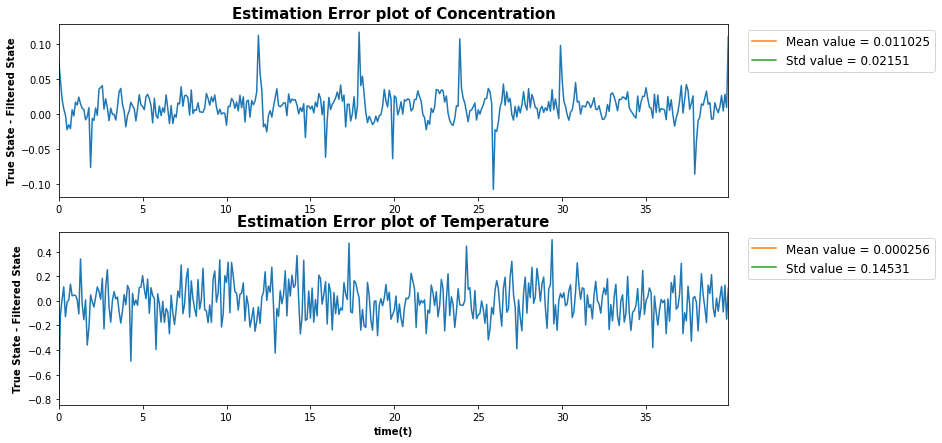

In [ ]:
t = 0.1*np.arange(len(updated_predictions2[:400]))

plt.figure(1,figsize = (12,7))
plt.subplot(211)
#plt.plot(t,true_states[:-1,0]-updated_predictions2[:,0])
plt.plot(t,true_states[:400,0]-updated_predictions2[:400,0])
plt.plot([],[],label = "Mean value = %2.6f" % (np.mean(true_states[:-1,0]-updated_predictions2[:,0])))
plt.plot([],[],label = "Std value = %2.5f" % (np.std(true_states[:-1,0]-updated_predictions2[:,0])))
#plt.xlabel('time(t)',fontsize=12, fontweight='bold')
plt.ylabel('True State - Filtered State',fontsize=10, fontweight='bold')
plt.title('Estimation Error plot of Concentration',fontsize=15, fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x', tight=True)
#plt.savefig('estimation error conc_130% RK.png',dpi=250,bbox_extra_artists=(lgd,), bbox_inches='tight')


#plt.figure(2,figsize = (12,4))
plt.subplot(212)
#plt.plot(t,true_states[:-1,1]-updated_predictions2[:,1])
plt.plot(t,true_states[:400,1]-updated_predictions2[:400,1])
plt.plot([],[],label = "Mean value = %2.6f" % (np.mean(true_states[:-1,1]-updated_predictions2[:,1])))
plt.plot([],[],label = "Std value = %2.5f" % (np.std(true_states[:-1,1]-updated_predictions2[:,1])))
plt.xlabel('time(t)',fontsize=10, fontweight='bold')
plt.ylabel('True State - Filtered State',fontsize=10, fontweight='bold')
plt.title('Estimation Error plot of Temperature',fontsize=15, fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x', tight=True)
#plt.savefig('estimation error 60% HOR.png',dpi=250,bbox_extra_artists=(lgd,), bbox_inches='tight')

##**Detail about comparison plots**

diverged indicate when model was same as before and data was at 40% redution

optimized indicate that errors after partial weight training

initial indicate when data at operating condition and model is also trained on that data

##**Comparison of Innovation plots**

In [ ]:
inno_temp_dev = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/data for comparison plot/RK 60%/innovation_Temp_diverged.csv')
inno_temp_opt = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/data for comparison plot/RK 60%/innovation_Temp_optimized.csv')
inno_temp_ini = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/data for comparison plot/RK 60%/innovation_Temp_initial.csv')

inno_conc_dev = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/data for comparison plot/RK 60%/innovation_conc_diverged.csv')
inno_conc_opt = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/data for comparison plot/RK 60%/innovation_conc_optimized.csv')
inno_conc_ini = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/data for comparison plot/RK 60%/innovation_conc_initial.csv')

inno_temp_dev  = np.array(inno_temp_dev )
inno_temp_opt = np.array(inno_temp_opt)
inno_temp_ini = np.array(inno_temp_ini)

inno_conc_dev = np.array(inno_conc_dev)
inno_conc_opt = np.array(inno_conc_opt)
inno_conc_ini = np.array(inno_conc_ini)

In [ ]:
a = inno_temp_ini[:200]
b = inno_temp_dev[200:400]
c = inno_temp_opt[400:600]

inno_temp = np.concatenate((a,b,c),axis=0)

d = inno_conc_ini[:200]
e = inno_conc_dev[200:400]
f = inno_conc_opt[400:600]

inno_conc = np.concatenate((d,e,f),axis=0)

In [ ]:
e[0] = d[-1]
e[-1] = f[0]  

b[0]=a[-1]
b[-1]=c[0]

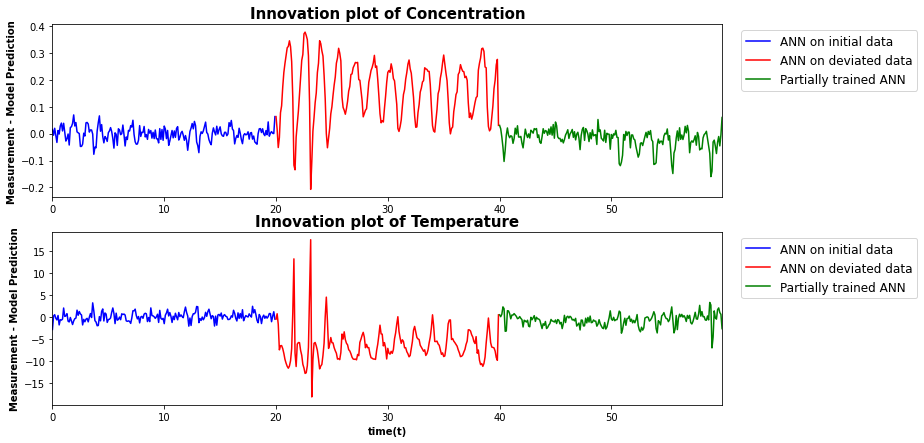

In [ ]:
#t = 0.1*np.arange(len(inno_conc)/3)

plt.figure(1,figsize = (12,7))
plt.subplot(211)

t = 0.1*np.arange(0,200,1)
plt.plot(t,d,'b')
t = 0.1*np.arange(200,400,1)
plt.plot(t,e,'r')
t = 0.1*np.arange(400,600,1)
plt.plot(t,f,'g')

#plt.xlabel('time(t)',fontsize=12, fontweight='bold')
plt.ylabel('Measurement - Model Prediction',fontsize=10, fontweight='bold')
plt.title('Innovation plot of Concentration',fontsize=15, fontweight='bold')
lgd = plt.legend(['ANN on initial data','ANN on deviated data','Partially trained ANN'],bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x', tight=True)
#plt.savefig('conc_optimized_RK inno plots.png',dpi=250,bbox_extra_artists=(lgd,), bbox_inches='tight')


#plt.figure(2,figsize = (12,4))
plt.subplot(212)

t = 0.1*np.arange(0,200,1)
plt.plot(t,a,'b')
t = 0.1*np.arange(200,400,1)
plt.plot(t,b,'r')
t = 0.1*np.arange(400,600,1)
plt.plot(t,c,'g')

plt.xlabel('time(t)',fontsize=10, fontweight='bold')
plt.ylabel('Measurement - Model Prediction',fontsize=10, fontweight='bold')
plt.title('Innovation plot of Temperature',fontsize=15, fontweight='bold')
lgd = plt.legend(['ANN on initial data','ANN on deviated data','Partially trained ANN'],bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x', tight=True)
plt.savefig('optimized_innovation for 60% RK plots.png',dpi=250,bbox_extra_artists=(lgd,), bbox_inches='tight')

##**Comparison of Estimation Error plots**

In [ ]:
# estima_conc_dev = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/data for comparison plot/RK 60%/Estimation_error_conc_diverged.csv')
# estima_conc_ini = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/data for comparison plot/RK 60%/Estimation_error_conc_initial.csv')
# estima_conc_opt = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/data for comparison plot/RK 60%/Estimation_error_conc_optimized.csv') 

# estima_temp_dev = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/data for comparison plot/RK 60%/Estimation_error_temp_diverged.csv')
# estima_temp_ini = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/data for comparison plot/RK 60%/Estimation_error_temp_initial.csv')
# estima_temp_opt = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/data for comparison plot/RK 60%/Estimation_error_temp_optimized.csv') 

estima_conc_dev = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/data for comparison plot/temp as measured state/HOR 60%/Estimation_error_conc_deviated.csv')
estima_conc_ini = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/data for comparison plot/temp as measured state/HOR 60%/Estimation_error_conc_initial.csv')
estima_conc_opt = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/data for comparison plot/temp as measured state/HOR 60%/Estimation_error_conc_optimized.csv') 

estima_temp_dev = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/data for comparison plot/temp as measured state/HOR 60%/Estimation_error_temp_deviated.csv')
estima_temp_ini = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/data for comparison plot/temp as measured state/HOR 60%/Estimation_error_temp_initial.csv')
estima_temp_opt = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Digvijays data/data for comparison plot/temp as measured state/HOR 60%/Estimation_error_temp_optimized.csv')

estima_conc_dev  = np.array(estima_conc_dev)
estima_conc_ini = np.array(estima_conc_ini)
estima_conc_opt = np.array(estima_conc_opt)

estima_temp_dev = np.array(estima_temp_dev)
estima_temp_ini = np.array(estima_temp_ini)
estima_temp_opt = np.array(estima_temp_opt)


In [ ]:
a = estima_temp_ini[:200]
b = estima_temp_dev[200:400]
c = estima_temp_opt[400:600]

estima_temp = np.concatenate((a,b,c),axis=0)

d = estima_conc_ini[:200]
e = estima_conc_dev[200:400]
f = estima_conc_opt[400:600]

estima_conc = np.concatenate((d,e,f),axis=0)

In [ ]:
e[0] = d[-1]
e[-1] = f[0]  

b[0]=a[-1]
b[-1]=c[0]

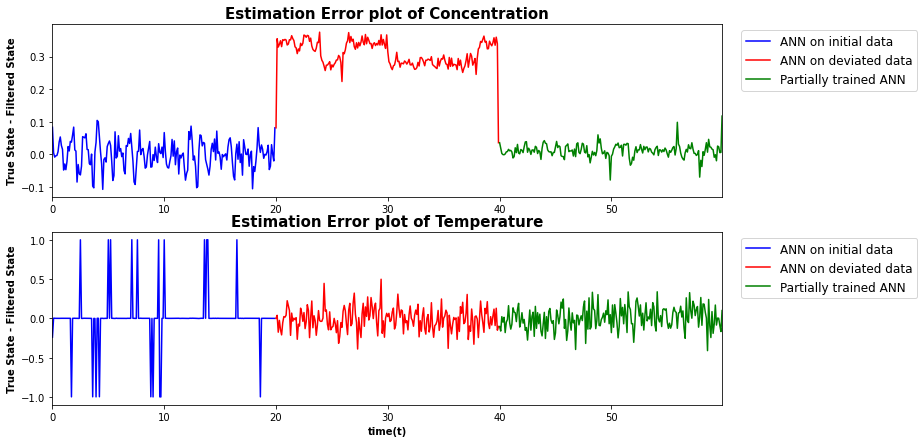

In [ ]:


plt.figure(1,figsize = (12,7))
plt.subplot(211)

t = 0.1*np.arange(0,200,1)
plt.plot(t,d,'b')
t = 0.1*np.arange(200,400,1)
plt.plot(t,e,'r')
t = 0.1*np.arange(400,600,1)
plt.plot(t,f,'g')

#plt.xlabel('time(t)',fontsize=12, fontweight='bold')
plt.ylabel('True State - Filtered State',fontsize=10, fontweight='bold')
plt.title('Estimation Error plot of Concentration',fontsize=15, fontweight='bold')
lgd = plt.legend(['ANN on initial data','ANN on deviated data','Partially trained ANN'],bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x', tight=True)
#plt.savefig('conc_optimized_RK est error plots.png',dpi=250,bbox_extra_artists=(lgd,), bbox_inches='tight')


#plt.figure(2,figsize = (12,4))
plt.subplot(212)

t = 0.1*np.arange(0,200,1)
plt.plot(t,a,'b')
t = 0.1*np.arange(200,400,1)
plt.plot(t,b,'r')
t = 0.1*np.arange(400,600,1)
plt.plot(t,c,'g')

plt.xlabel('time(t)',fontsize=10, fontweight='bold')
plt.ylabel('True State - Filtered State',fontsize=10, fontweight='bold')
plt.title('Estimation Error plot of Temperature',fontsize=15, fontweight='bold')
lgd = plt.legend(['ANN on initial data','ANN on deviated data','Partially trained ANN'],bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 12)
plt.autoscale(enable=True, axis='x', tight=True)
plt.savefig('optimized est error for 60% HOR plots.png',dpi=250,bbox_extra_artists=(lgd,), bbox_inches='tight')

##saving the comparative data

In [ ]:
# df = pd.DataFrame(measured_states[:-1,0]-model_predictions2[:,0])
# df.to_csv('innovation_conc_diverged.csv',index=False)

# df2 = pd.DataFrame(measured_states[:-1,1]-model_predictions2[:,1])
# df2.to_csv('innovation_Temp_diverged.csv',index=False)

# df3 = pd.DataFrame(true_states[:-1,0]-updated_predictions2[:,0])
# df3.to_csv('Estimation_error_conc_deviated.csv',index=False)

# df4 = pd.DataFrame(true_states[:-1,1]-updated_predictions2[:,1])
# df4.to_csv('Estimation_error_temp_deviated.csv',index=False)

In [ ]:
#!pip install --upgrade gupload

from pydrive.auth import GoogleAuth
from google.colab import auth

# Authenticate and create the PyDrive client.
auth.authenticate_user()

!gupload --to '1YZv0CZMOPgnRbx6bxNVCXiXgfvm8sAAp' *.png
#!gupload --to '1XlkPHRQ6IWE81Kb_WIA0sy5TKp4vhzsT' model_ANN_new.pth

 #if multiple images
  #!gupload --to '1wNJUZtQD_6oBvvUhWRlAb0xjjjoLZQ' *.png

Uploading file: optimized est error for 60% HOR plots.png
